In [9]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [10]:
# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Load the resumes and job descriptions datasets from CSV files
resumes_df = pd.read_csv("./data/Resume.csv")
job_descriptions_df = pd.read_csv("./data/job_descriptions.csv")

In [12]:
# Data Preprocessing
def preprocess_text(text):
    # convert all characters in the string to lower case
    text = text.lower()
    # remove non-english characters, punctuation and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # tokenize word
    text = word_tokenize(text)
    # remove stop words
    text = [w for w in text if not w in stopwords.words('english')]
    # stemming
    text = [PorterStemmer().stem(w) for w in text]

    return ' '.join(text)

In [13]:
resumes_df['Processed_Resume'] = resumes_df['Resume_str'].apply(preprocess_text)
resumes_df.head()

,ID,Resume_str,Resume_html,Category,Processed_Resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administr market associ hr administr summar...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist us hr oper summari versatil medi...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summari year experi recruit plu ye...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summari dedic driven dynam year ...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manag skill highlight hr skill hr depart st...


In [14]:
# Remove irrelevant columns
resumes_df.pop('ID')
resumes_df.pop('Resume_html')

0       <div class="fontsize fontface vmargins hmargin...
1       <div class="fontsize fontface vmargins hmargin...
2       <div class="fontsize fontface vmargins hmargin...
3       <div class="fontsize fontface vmargins hmargin...
4       <div class="fontsize fontface vmargins hmargin...
                              ...                        
2479    <div class="fontsize fontface vmargins hmargin...
2480    <div class="fontsize fontface vmargins hmargin...
2481    <div class="fontsize fontface vmargins hmargin...
2482    <div class="fontsize fontface vmargins hmargin...
2483    <div class="fontsize fontface vmargins hmargin...
Name: Resume_html, Length: 2484, dtype: object

In [15]:
resumes_df.head()

,Resume_str,Category,Processed_Resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administr market associ hr administr summar...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr oper summari versatil medi...
2,HR DIRECTOR Summary Over 2...,HR,hr director summari year experi recruit plu ye...
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summari dedic driven dynam year ...
4,HR MANAGER Skill Highlights ...,HR,hr manag skill highlight hr skill hr depart st...


In [16]:
job_descriptions_df = job_descriptions_df[:2500]
job_descriptions_df['Processed_Job_Description'] = job_descriptions_df['Job Description'].apply(preprocess_text)
job_descriptions_df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Processed_Job_Description
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",social media manag overse organ social media p...
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",frontend web develop design implement user int...
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",qualiti control manag establish enforc qualiti...
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",wireless network engin design implement mainta...
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",confer manag coordin manag confer meet event p...


In [17]:
job_descriptions_df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Processed_Job_Description
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",social media manag overse organ social media p...
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",frontend web develop design implement user int...
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",qualiti control manag establish enforc qualiti...
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",wireless network engin design implement mainta...
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",confer manag coordin manag confer meet event p...


In [18]:
# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=1000, lowercase=True, stop_words='english')
X_resumes = tfidf_vectorizer.fit_transform(resumes_df['Processed_Resume'])
X_job_descriptions = tfidf_vectorizer.fit_transform(job_descriptions_df['Processed_Job_Description'])

In [19]:
# Replace np.nan with empty strings in both columns to avoid ValueError in vectorization
job_descriptions_df['Processed_Job_Description'].fillna('', inplace=True)
resumes_df['Processed_Resume'].fillna('', inplace=True)

# Combine all processed texts again after filling NaN values
all_processed_texts = pd.concat(
    [job_descriptions_df['Processed_Job_Description'], resumes_df['Processed_Resume']],
    axis=0
)

# Fit the vectorizer on all processed texts
tfidf_vectorizer.fit(all_processed_texts)

# Transform the processed job descriptions and resumes into TF-IDF vectors
tfidf_job_desc = tfidf_vectorizer.transform(job_descriptions_df['Processed_Job_Description'])
tfidf_resumes = tfidf_vectorizer.transform(resumes_df['Processed_Resume'])

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between each resume and each job description
cosine_similarities = cosine_similarity(tfidf_resumes, tfidf_job_desc)

# For each resume, find the job description with the highest cosine similarity
best_matches_indices = cosine_similarities.argmax(axis=1)

# Extract the best match scores for each resume
best_match_scores = cosine_similarities[np.arange(len(cosine_similarities)), best_matches_indices]

# Create a DataFrame to show the best matching job description for each resume
matches_df = pd.DataFrame({
    'Resume_Index': np.arange(len(resumes_df)),
    'Job_Desc_Index': best_matches_indices,
    'Cosine_Similarity': best_match_scores
})

matches_df.head()

,Resume_Index,Job_Desc_Index,Cosine_Similarity
0,0,824,0.343256
1,1,1856,0.357053
2,2,1263,0.415153
3,3,824,0.377349
4,4,1263,0.699638


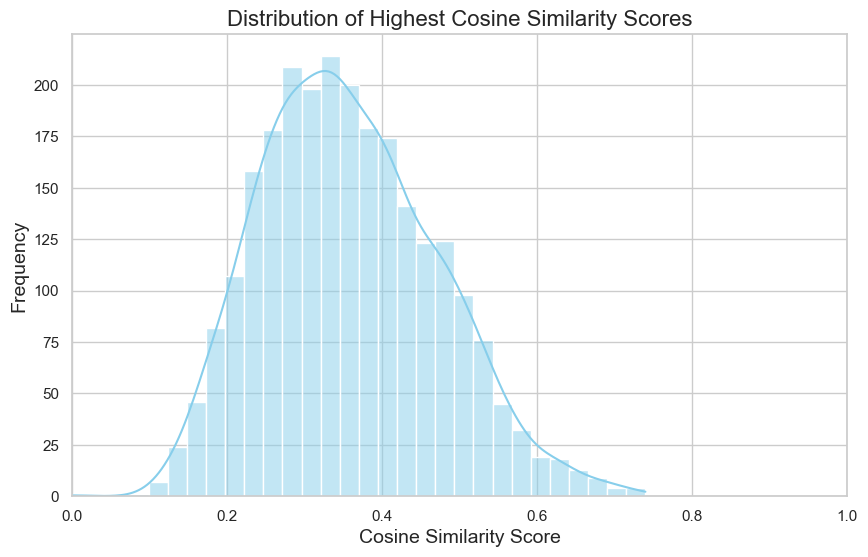

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'matches_df' is your DataFrame and it includes a 'Cosine_Similarity' column

# Setting the style
sns.set(style='whitegrid')

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(matches_df['Cosine_Similarity'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Highest Cosine Similarity Scores', fontsize=16)
plt.xlabel('Cosine Similarity Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0, 1)  # Cosine similarity ranges from 0 to 1
plt.show()
